In [1]:
%matplotlib inline
%pylab inline
import pylab
pylab.rcParams['figure.figsize'] = (5.0, 5.0)
from tsne import bh_sne # thi is the correct tsne to use.  It's the one discussed btnw
from bhtsne import bh_tsne
import sklearn.manifold
from matplotlib import pyplot as plt
import pandas
import scipy
import numpy as np
import os
import gc
from time import gmtime, strftime
import seaborn as sns
from os import listdir
from os.path import isfile, join
import math
from scipy.stats.stats import pearsonr
import random as rand
from sklearn.preprocessing import normalize
from collections import defaultdict
import pickle
# from helpers import *
execfile( "./helpers.py")


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib
helpers executed


### load all the data at 200m

In [2]:

def get_where_img0_is_1(pddf):
    img0_metadata = (META.loc[META['img0'] == 1])
    return pddf.loc[pddf['hcad'].isin(list(img0_metadata['hcad']))]
TERRAIN = load_dataset("/home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_200.hd")

hcad_data = [
    load_dataset("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_100.hd", include_hcad= False),
     load_dataset("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd", include_hcad= False),
     load_dataset("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_400.hd", include_hcad= False),
    load_dataset("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd", include_hcad= False)
]

hcad = load_dataset("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd")
# hcad = hcad[['hcad', 'mean_accrued_depr_pct', 'mean_bld_val', 'mean_land_val','mean_quality','mean_rcnld', 'mean_tot_mkt_val','mean_year_built','mean_year_remodeled']]
META = load_dataset("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")
WIND = load_dataset("/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad200_hist16x16.mat.hd")

Y_DATA = load_dataset("/home/isaac/Dropbox/data_for_brian/y_df.hd")



# @memo
img0_y_data = get_where_img0_is_1(Y_DATA)
img0_terrain_data = get_where_img0_is_1(TERRAIN)
img0_wind_data = get_where_img0_is_1(WIND)
img0_hcad_data = get_where_img0_is_1(hcad)
img0_metadata = (META.loc[META['img0'] == 1])
# print get_where_img0_is_1(WIND)
def plot_on_map(pddf, meta = META):
    for col in pddf.columns:
        print("\n\n\n",col)
        xy = pandas.DataFrame.from_dict({'x': -meta['pointx'],'y': meta['pointy']})
        print("linear plot")
        fast_show_ratio_plot(xy,np.array(pddf[col]))
        print("log plot")
        fast_show_ratio_plot(xy,np.array(pddf[col]), log = True)
        colored_scatter(xy,np.array(pddf[col]))

Opening /home/isaac/Dropbox/data_for_brian/terrain_features/dsmgrid/terrain_200.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_100.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_400.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_1000.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/meta/df_meta.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad200_hist16x16.mat.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

### make an embedding

In [48]:

# print img0_hcad_data.shape

# np.savetxt('y.csv', img0_y_data, delimiter=',') 

embedding_2d = fast_tsne(img0_hcad_data, embedded_dimensions=2)



In [59]:
pickle.dump(embedding_2d, open( "img0_hcad_data_2d_embed.p", "wb" ))

[[   9.09896396   10.48251672    9.31655884   10.95815071    3.78714682]
 [-796.02451861    9.08407422   10.94314419    9.51374275   10.69874208]
 [   9.69976613   10.89266217    9.51430084   10.69882968    9.50400789]
 ..., 
 [  50.99869134   24.04653787   -6.69333412   -6.77382818   -6.66622111]
 [   8.83868819 -191.56343468   -6.69315469   -6.77386007   -6.66603728]
 [ 114.50421105 -448.05556133   -6.69318709   -6.77371208   -6.66634776]]


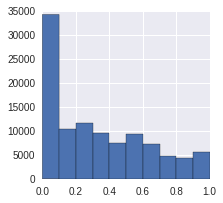

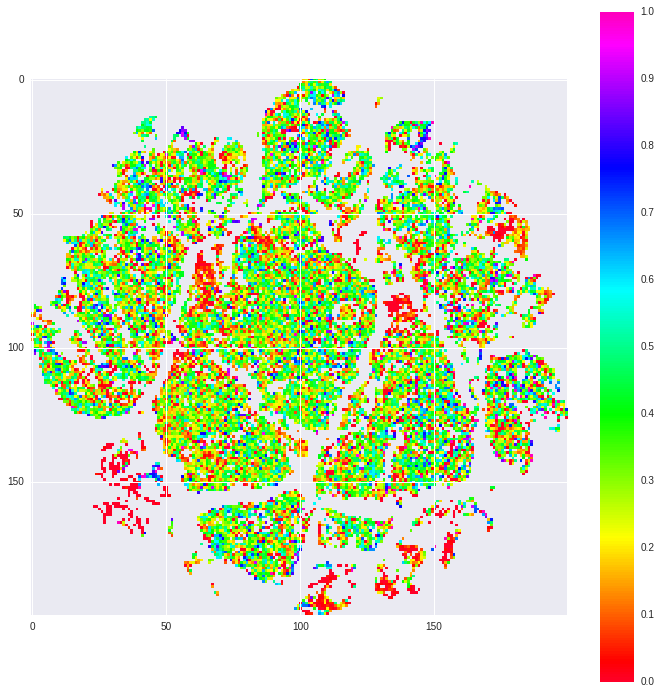

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [52]:
print(embedding_5d)
old_fast_show_ratio_plot(pandas.DataFrame.from_dict({'x': embedding_2d[:,0],
                                             'y': embedding_2d[:,1]}), np.array(img0_y_data['y200_mean'])[:])

### kmeans cluster the data

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(init='k-means++', n_clusters=30)
kmeans.fit(embedding_2d)
print kmeans.labels_

# np.random.shuffle(kmeans.labels_)
colored_scatter(pandas.DataFrame.from_dict({'x': - img0_metadata ['pointx'][:len(kmeans.labels_)],
                                            'y': img0_metadata['pointy'][:len(kmeans.labels_)]}), kmeans.labels_)
fast_show_ratio_plot(pandas.DataFrame.from_dict({'x': - img0_metadata ['pointx'][:len(kmeans.labels_)],
                                                 'y': img0_metadata['pointy'][:len(kmeans.labels_)]}),kmeans.labels_)

for label in range(max(kmeans.labels_)+1):
    print "class", label, "damage:",np.mean(np.array(img0_y_data['y200_mean'])[numpy.where(kmeans.labels_==label)])

NameError: name 'embedding_2d' is not defined

In [ ]:
print pandas.read_pickle("/home/isaac/Desktop/devika/gitignored/testing_refactored_code/_mean_accrued_depr_pct_std_accrued_depr_p_n:100")

In [ ]:
# print np.array(tsne_embed['x'])[0]
# show_ratio_plot(tsne_embed, hcad['mean_bld_val'])
# print get_meta()
# print Y_DATA

plot_on_map(img0_hcad_data, meta = img0_metadata)

 ### CNN

In [4]:

# ############################# Batch iterator ###############################
# This is just a simple helper function iterating over training data in
# mini-batches of a particular size, optionally in random order. It assumes
# data is available as numpy arrays. For big datasets, you could load numpy
# arrays as memory-mapped files (np.load(..., mmap_mode='r')), or write your
# own custom data iteration function. For small datasets, you can also copy
# them to GPU at once for slightly improved performance. This would involve
# several changes in the main program, though, and is not demonstrated here.

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
print("Loading data...")
X_train, y_train, X_val, y_val, X_test, y_test = load_mega_hcad()

# use this to show that the network trains on simple identity data
for i, _ in enumerate(X_train):
    X_train[i].fill(y_train[i])



Loading data...
('hcad length', (702356, 285))
('y_data length', (702356, 10))


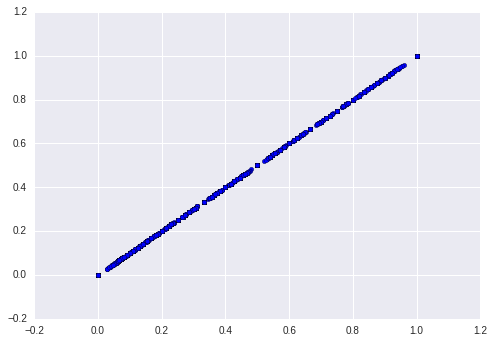

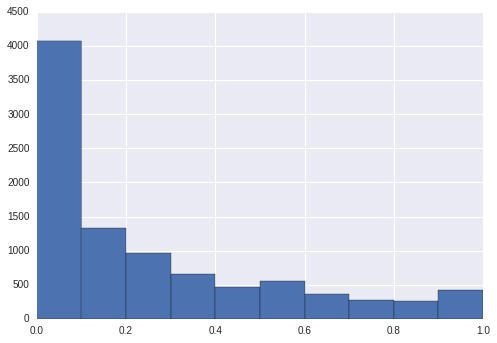

In [4]:
# print(X_train)
plt.scatter(X_train[:,0,3,0], y_train)
plt.show()
plt.hist(y_train)
plt.show()

[ 0.35714286  0.          0.33333333 ...,  0.16666667  0.71428571  0.625     ]
(9364,)
train max 1.0
x train shape (9364, 1, 285, 1)
Building model and compiling functions...
Starting training...
params   [ 0.]
(1000, 1, 285, 1)


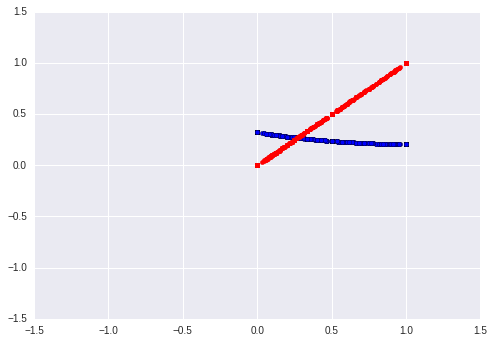

Epoch 1 of 500 took 0.363s
  training loss:		0.110706
  training loss without regularization:		0.106689
  validation loss:		0.117944
  validation accuracy:		96.68 %


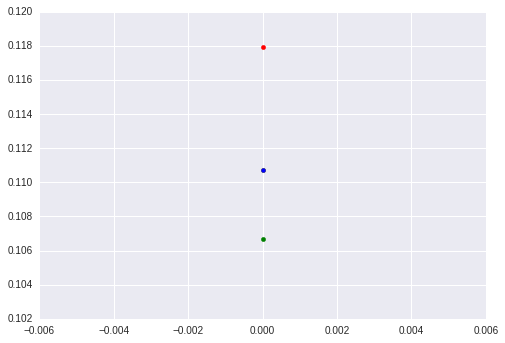

params   [-0.04581838]
(1000, 1, 285, 1)


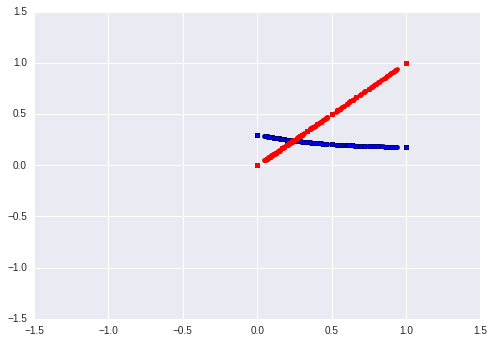

Epoch 2 of 500 took 0.316s
  training loss:		0.098745
  training loss without regularization:		0.094625
  validation loss:		0.101659
  validation accuracy:		96.68 %


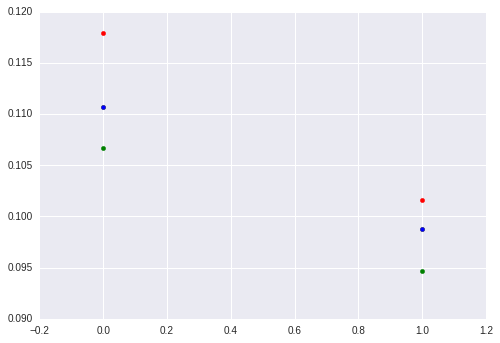

params   [-0.11999135]
(1000, 1, 285, 1)


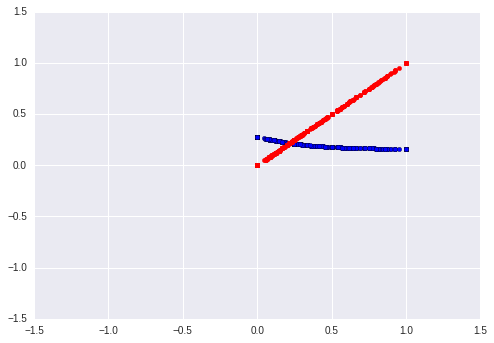

Epoch 3 of 500 took 0.305s
  training loss:		0.087329
  training loss without regularization:		0.083078
  validation loss:		0.087494
  validation accuracy:		96.68 %


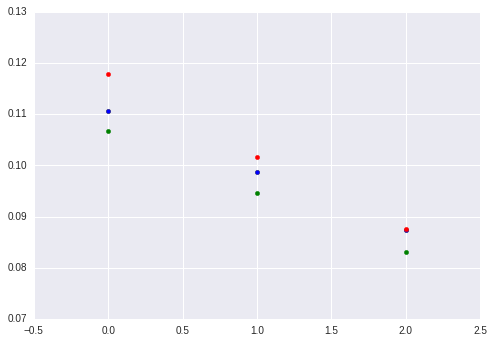

params   [-0.19646578]
(1000, 1, 285, 1)


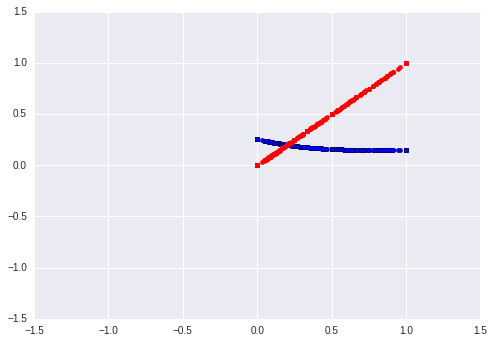

Epoch 4 of 500 took 0.316s
  training loss:		0.077680
  training loss without regularization:		0.073296
  validation loss:		0.076692
  validation accuracy:		96.68 %


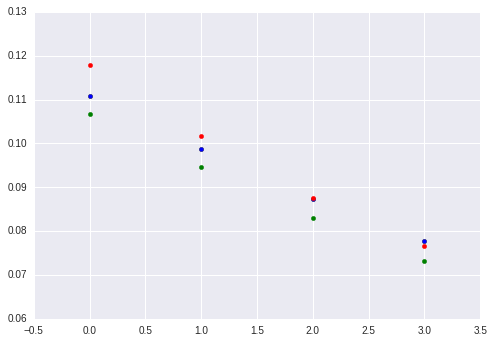

params   [-0.2663905]
(1000, 1, 285, 1)


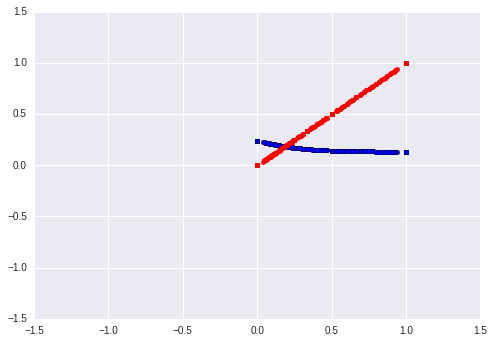

Epoch 5 of 500 took 0.304s
  training loss:		0.070705
  training loss without regularization:		0.066199
  validation loss:		0.068750
  validation accuracy:		96.68 %


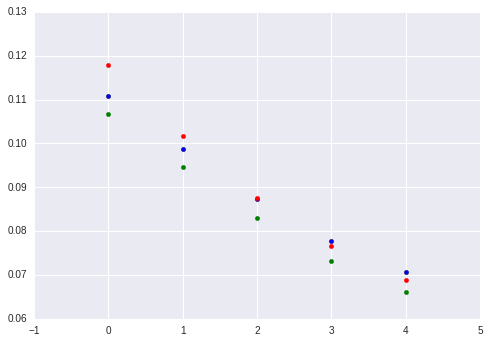

params   [-0.32790932]


KeyboardInterrupt: 

In [9]:
from __future__ import print_function

import sys
import os
import time

import numpy as np
import theano
import theano.tensor as T

import lasagne
from lasagne.regularization import regularize_layer_params_weighted
from lasagne.init import Constant, GlorotUniform



def build_cnn(input_var=None):
    # As a third model, we'll create a CNN of two convolution + pooling stages
    # and a fully-connected hidden layer in front of the output layer.

    # Input layer, as usual:
    network = lasagne.layers.InputLayer(shape=(None, 1, 1, X_train.shape[2]),
                                        input_var=input_var)
    
    #####make a single dense layer
    hidden_layer = lasagne.layers.DenseLayer(
            network,
            #lasagne.layers.dropout(network, p=.5),
            num_units=1,
            nonlinearity=lasagne.nonlinearities.sigmoid)
    
    
    network = lasagne.layers.DenseLayer(
            hidden_layer,
            #lasagne.layers.dropout(network, p=.5),
            num_units=1,
            nonlinearity=lasagne.nonlinearities.sigmoid)

    return network
    
    # This time we do not apply input dropout, as it tends to work less well
    # for convolutional layers.

    # Convolutional layer with 32 kernels of size 5x5. Strided and padded
    # convolutions are supported as well; see the docstring.
    network = lasagne.layers.Conv2DLayer(
            network, num_filters=32, filter_size=(5, 1),
            nonlinearity=lasagne.nonlinearities.rectify,
            W=GlorotUniform('relu'), b=Constant(0.0))
    # Expert note: Lasagne provides alternative convolutional layers that
    # override Theano's choice of which implementation to use; for details
    # please see http://lasagne.readthedocs.org/en/latest/user/tutorial.html.

    # Max-pooling layer of factor 2 in both dimensions:
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 1))

    # Another convolution with 32 5x5 kernels, and another 2x2 pooling:
    network = lasagne.layers.Conv2DLayer(
            network, num_filters=32, filter_size=(5, 1),
            nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 1))

    # A fully-connected layer of 256 units with 50% dropout on its inputs:
    network = lasagne.layers.DenseLayer(
            lasagne.layers.dropout(network, p=.5),
            num_units=256,
            nonlinearity=lasagne.nonlinearities.rectify)

    # And, finally, the 10-unit output layer with 50% dropout on its inputs:
    network = lasagne.layers.DenseLayer(
            network,
            #lasagne.layers.dropout(network, p=.5),
            num_units=1,
            nonlinearity=lasagne.nonlinearities.rectify)

    return network


def main(model='mlp', num_epochs=500):
    training_losses = []
    training_losses_no_reg = []
    validation_losses = []
    print(y_train)
    print(y_train.shape)
    print("train max", np.max(y_train))
    print("x train shape", X_train.shape)

    # Prepare Theano variables for inputs and targets
    input_var = T.tensor4('inputs')
    target_var = T.ivector('targets')

    # Create neural network model (depending on first command line parameter)
    print("Building model and compiling functions...")

    network = build_cnn(input_var)


    # Create a loss expression for training, i.e., a scalar objective we want
    prediction = lasagne.layers.get_output(network)
    reg = lasagne.regularization.regularize_network_params(network, lasagne.regularization.l2)
    reg_param = .001

    loss = lasagne.objectives.squared_error(prediction.transpose(), target_var)
    loss = loss.mean() + reg_param * reg
    # We could add some weight decay as well here, see lasagne.regularization.

    # Create update expressions for training, i.e., how to modify the
    # parameters at each training step. Here, we'll use Stochastic Gradient
    # Descent (SGD) with Nesterov momentum, but Lasagne offers plenty more.
    params = lasagne.layers.get_all_params(network, trainable=True)
    updates = lasagne.updates.nesterov_momentum(
            loss, params, learning_rate= .01, momentum=0.9)

    # Create a loss expression for validation/testing. The crucial difference
    # here is that we do a deterministic forward pass through the network,
    # disabling dropout layers.
    test_prediction = lasagne.layers.get_output(network)

    test_loss = lasagne.objectives.squared_error(test_prediction.transpose(),
                                                            target_var) 
    test_loss = test_loss.mean()
    # As a bonus, also create an expression for the classification accuracy:
    test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),
                      dtype=theano.config.floatX)

    # Compile a function performing a training step on a mini-batch (by giving
    # the updates dictionary) and returning the corresponding training loss:
    train_fn = theano.function([input_var, target_var], loss, updates=updates, allow_input_downcast=True)

    # Compile a second function computing the validation loss and accuracy:
    val_fn = theano.function([input_var, target_var], [test_loss, test_acc], allow_input_downcast=True)
    
    out_fn = theano.function([input_var], [lasagne.layers.get_output(network)], allow_input_downcast=True)

    # just trying to print network output
#     batch_size = 1000
#     for batch in iterate_minibatches(X_train, y_train, batch_size, shuffle=True):
#         inputs, targets = batch
#         print ("test prediction is", prediction.eval(inputs))

    # Finally, launch the training loop.
    batch_size = 1000
    print("Starting training...")
    # We iterate over epochs:
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        print("params  ", numpy.array(params[3].eval()))
        train_err = 0
        training_loss_no_reg = 0
        train_batches = 0
        start_time = time.time()
        inputs = None #take it out of loop scope
        targets = None
        for batch in iterate_minibatches(X_train, y_train, batch_size, shuffle=True):
            inputs, targets = batch
            #print(prediction(inputs))
#             print(inputs.shape)
#             print(targets)
#             print(out_fn(inputs),)
            training_loss_no_reg += val_fn(inputs, targets)[0]

            train_err += train_fn(inputs, targets)
            train_batches += 1
        plt.scatter(targets, out_fn(inputs))
        print(inputs.shape)
        plt.scatter(targets, inputs[:,0,3,0], color = 'red')
        plt.xlim(-1.5,  1.5)
        plt.ylim(-1.5,  1.5)
        plt.show()
        # And a full pass over the validation data:
        val_err = 0
        val_acc = 0
        val_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size, shuffle=True):
            inputs, targets = batch
            err, acc = val_fn(inputs, targets)
            val_err += err
            val_acc += acc
            val_batches += 1

        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss:\t\t{:.6f}".format(train_err / train_batches))
        print("  training loss without regularization:\t\t{:.6f}".format(training_loss_no_reg / train_batches))
        training_losses.append(train_err / train_batches)
        training_losses_no_reg.append(training_loss_no_reg / train_batches)
        validation_losses.append(val_err / val_batches)
        print("  validation loss:\t\t{:.6f}".format(val_err / val_batches))
        print("  validation accuracy:\t\t{:.2f} %".format(
            val_acc / val_batches * 100))
        plt.scatter(range(len(training_losses)), training_losses)
        plt.scatter(range(len(training_losses)), validation_losses, color = 'red')
        plt.scatter(range(len(training_losses)), training_losses_no_reg, color = 'green')
        plt.show()

    # After training, we compute and print the test error:
    test_err = 0
    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500, shuffle=True):
        inputs, targets = batch
        err, acc = val_fn(inputs, targets)
        test_err += err
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test loss:\t\t\t{:.6f}".format(test_err / test_batches))
    print("  test accuracy:\t\t{:.2f} %".format(
        test_acc / test_batches * 100))
    
    # Optionally, you could now dump the network weights to a file like this:
    # np.savez('model.npz', *lasagne.layers.get_all_param_values(network))
    #
    # And load them again later on like this:
    # with np.load('model.npz') as f:
    #     param_values = [f['arr_%d' % i] for i in range(len(f.files))]
    # lasagne.layers.set_all_param_values(network, param_values)


main()


In [32]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1=None

def nn_example(data):
    global net1
    net1 = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # layer parameters:
        input_shape=(None, 285),
        hidden_num_units=200,  # number of units in 'hidden' layer
        output_nonlinearity=lasagne.nonlinearities.sigmoid,
        output_num_units=1,  # 10 target values for the digits 0, 1, 2, ..., 9

        # optimization method:
        update=nesterov_momentum,
        update_learning_rate=0.01,
        update_momentum=0.9,

        max_epochs=1000,
        verbose=1,
         regression=True,
        )

    # Train the network
    print("training...")
    net1.fit(data['X_train'], data['y_train'])

    # Try the network on new data
    print("Feature vector (100-110): %s" % data['X_test'][0][100:110])
    print("Label: %s" % str(data['y_test'][0]))
    print("Predicted: %s" % str(net1.predict([data['X_test'][0]])))


# print("Got %i testing datasets." % len(data['X_train']))
data = {'X_test': (X_test.reshape(len(X_test), 285)).astype(np.float32), 
            'y_test': (y_test).astype(np.float32), 
            'X_train': (np.float32(X_train.reshape(len(X_train), 285))).astype(np.float32),
            'y_train': (y_train).astype(np.float32)}
nn_example(data)

training...
# Neural Network with 574001 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      285
  1  hidden    2000
  2  output       1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.09042       0.04194      2.15581  0.09s
      2       0.02521       0.01433      1.75892  0.09s
      3       0.01014       0.00699      1.45033  0.09s
      4       0.00556       0.00433      1.28307  0.09s
      5       0.00376       0.00317      1.18421  0.09s
      6       0.00291       0.00258      1.12660  0.08s
      7       0.00246       0.00225      1.09304  0.09s
      8       0.00219       0.00205      1.07271  0.09s
      9       0.00202       0.00191      1.06031  0.09s
     10       0.00191       0.00181      1.05268  0.08s
     11       0.00182       0.00174      1.04807  0.08s
     12       0.00176       0.00168      1.04516  0.08s
     13       0.00170       0.00

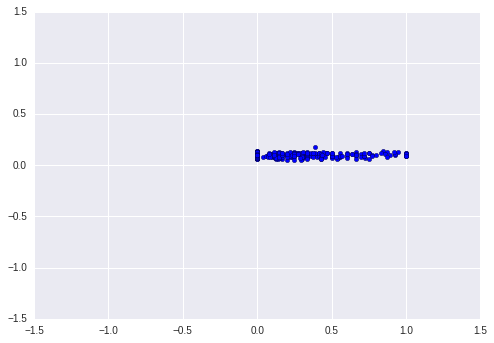

In [30]:
for i in range(300):
    plt.scatter(data['y_test'][i], net1.predict([data['X_test'][i]]))
plt.xlim(-1.5,  1.5)
plt.ylim(-1.5,  1.5)
plt.show()

### housing density - correlation with damage?  Apparently not.

In [ ]:
density = fast_show_ratio_plot(pandas.DataFrame.from_dict({'x': -META ['pointx'],
                                             'y': META ['pointy']}), np.ones(len(META)), normalize_buckets = False)

y_shuffle = np.copy(np.array(Y_DATA['y200_mean']))
np.random.shuffle(y_shuffle)
damage = fast_show_ratio_plot(pandas.DataFrame.from_dict({'x': -META ['pointx'],
                                             'y': META ['pointy']}), np.array(Y_DATA['y200_mean']))
damage = damage[density != 0]

density = density[density != 0]
print density.flatten()
damage.flatten()
print pearsonr(density.flatten(), damage.flatten())